## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 2. Data Pre-Processing

In [2]:
#Importing Dataset
data = pd.read_csv('spotify_tracks.csv')

In [3]:
#Dropping the Unnamed: 0 column
data = data.drop(['Unnamed: 0'] , axis=1)

In [4]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
#Names of the Columns Present in the Dataset
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [6]:
#Finding the shape of the dataset (rows,columns)
data.shape

(114000, 20)

In [7]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [9]:
#Finding the data types of the columns specifically
data.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## 3. Checking For Missing Values:

In [10]:
data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

C:\Users\my pc\AppData\Local\Temp\ipykernel_7012\1017638797.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


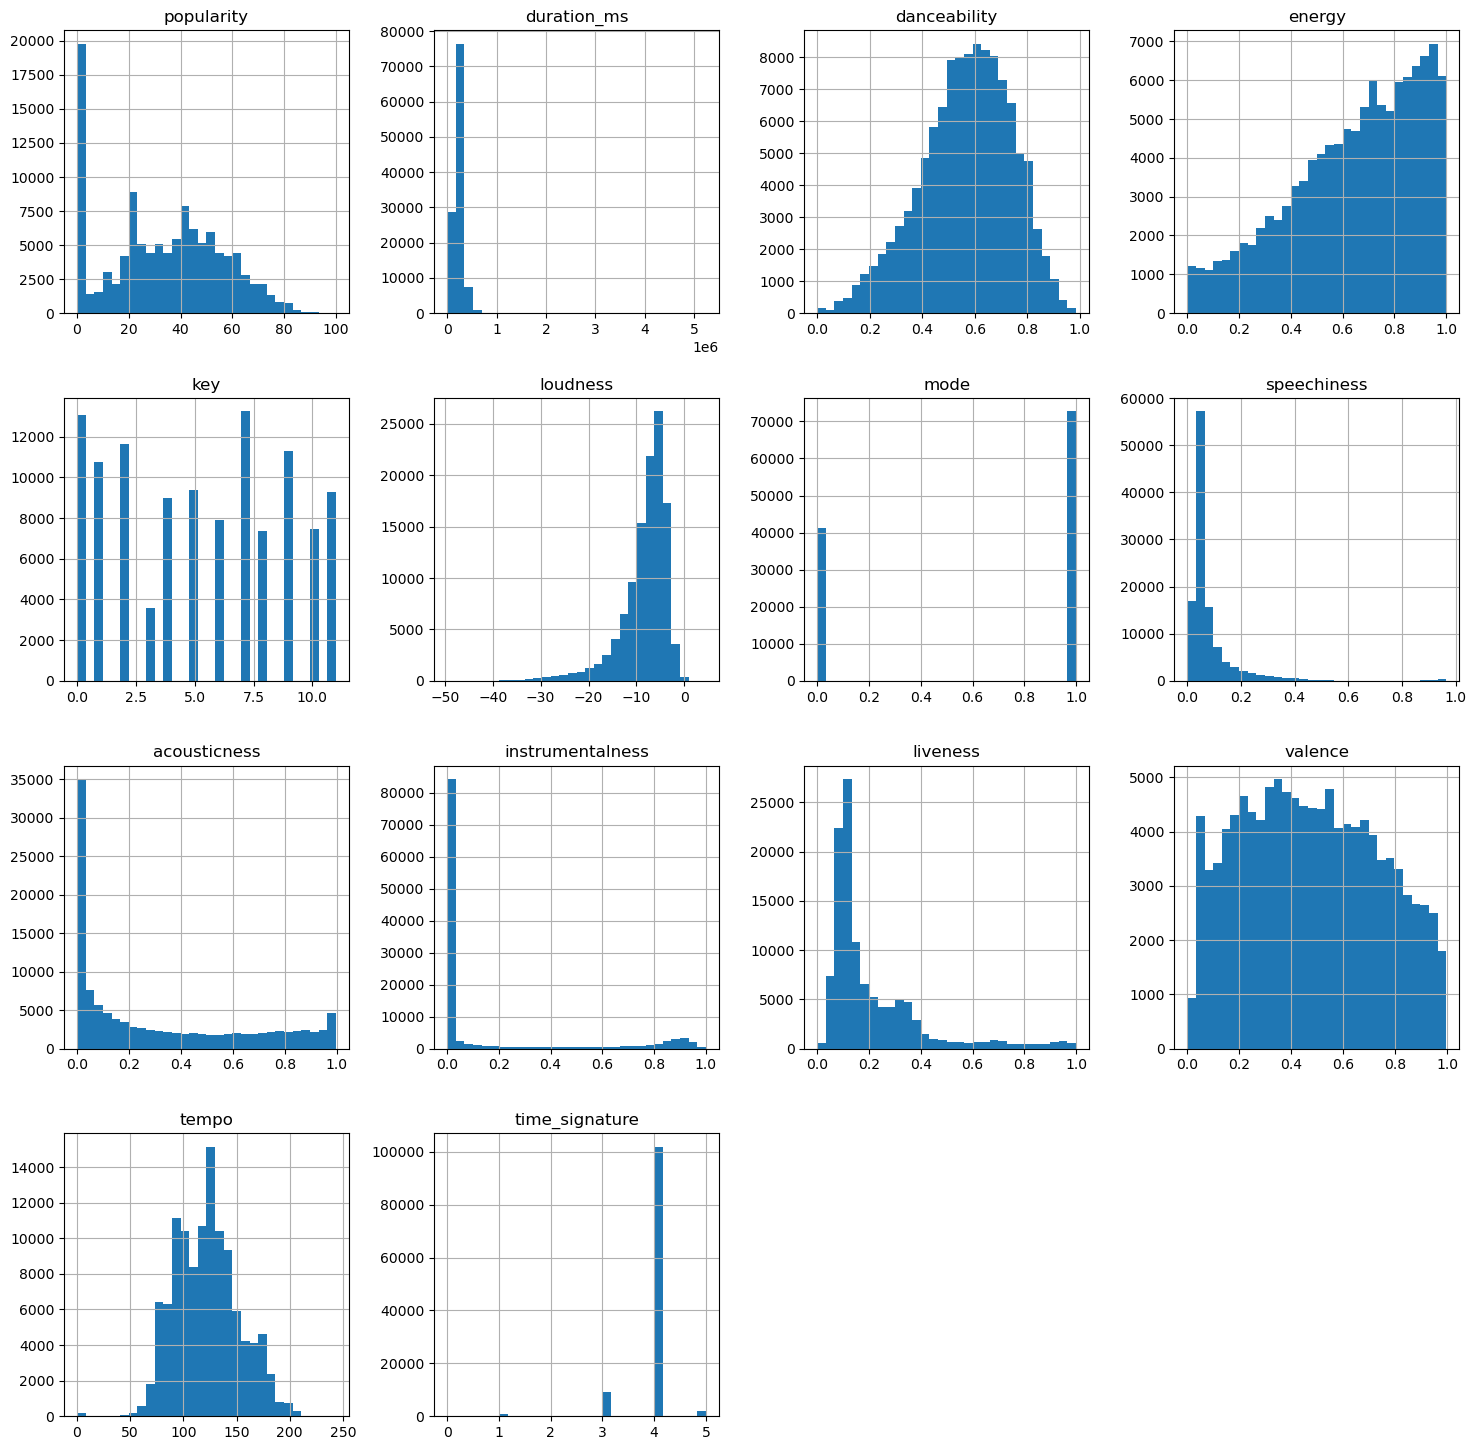

In [11]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

C:\Users\my pc\AppData\Local\Temp\ipykernel_7012\2469659730.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


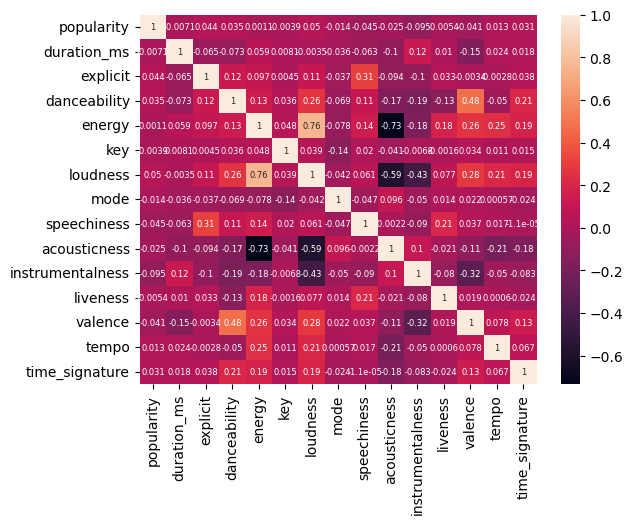

In [12]:
#Calculate the correlation matrix between Variables
corr = data.corr()

#Plot the heatmap
sns.heatmap(corr , annot = True , annot_kws={"size": 6})
plt.show()

## 4.Finding Outliers in the Data

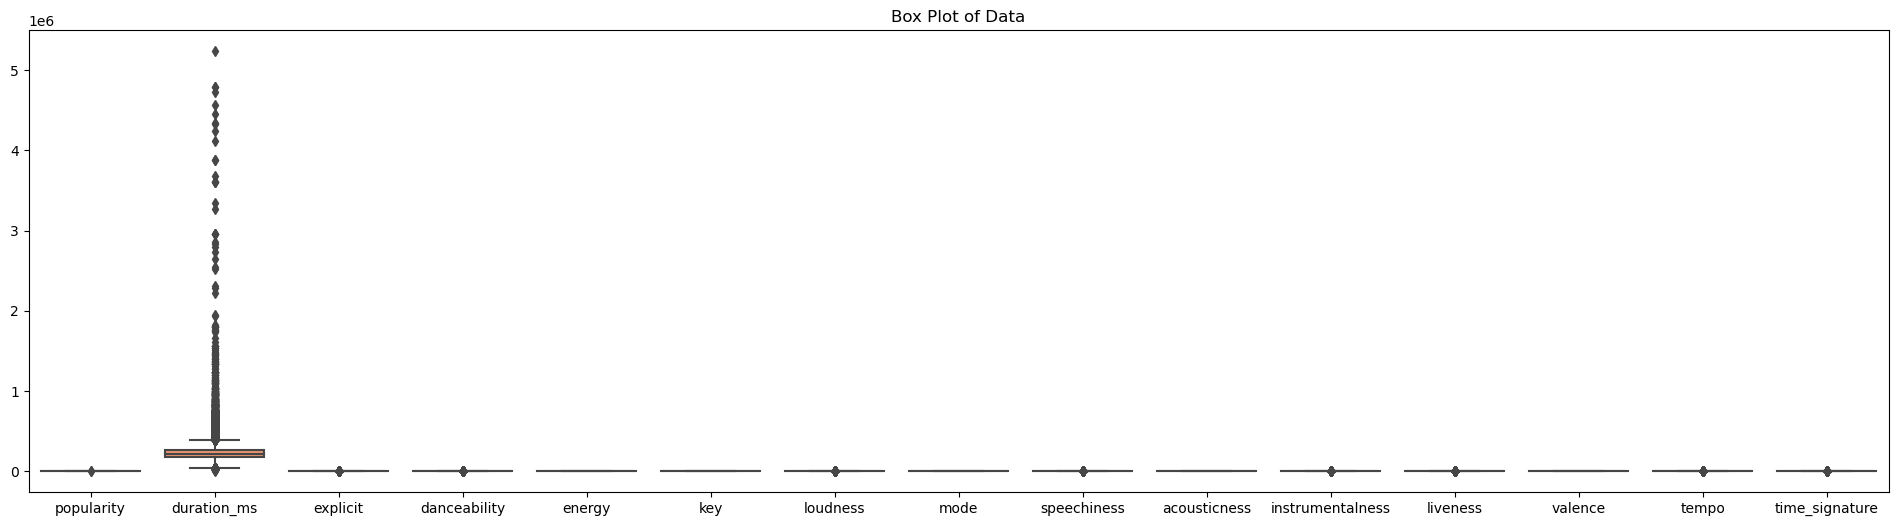

In [13]:
#The outliers can be detected by Visualizing the data. Therefore , we created a boxplot through Seaborn
plt.figure(figsize=(24, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Data')
plt.show()

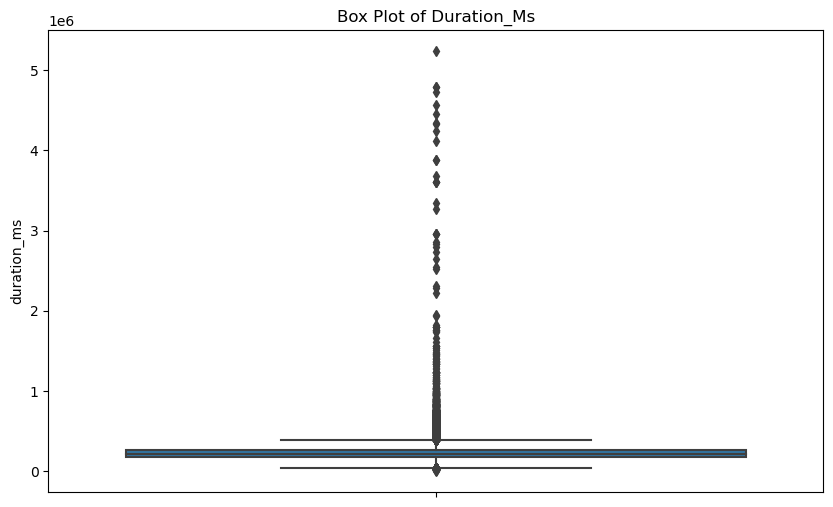

In [14]:
#We found above that the outliers are from the Variable/Feature of Duration_ms. We created a boxplot just for highlighting the variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=data , y='duration_ms' )
plt.title('Box Plot of Duration_Ms')
plt.show()

In [15]:
#Removing Outliers with Inter Quartile Range Method
numerical_cols = ['duration_ms']
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
    data = data[~outliers]

## Building a Recommendation Model with ML Algorithms

In [16]:
#Scaling the variables from the dataset
scaler = StandardScaler()
df = scaler.fit_transform(data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]])

In [17]:
#Applying K-Means on the scaled data (df)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(df)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [18]:
##Applying DBSCAN on the scaled data (df)
dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan.fit(df)

DBSCAN(eps=0.2, min_samples=2)

## Determining the Optimal Number of Clusters 

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\clust

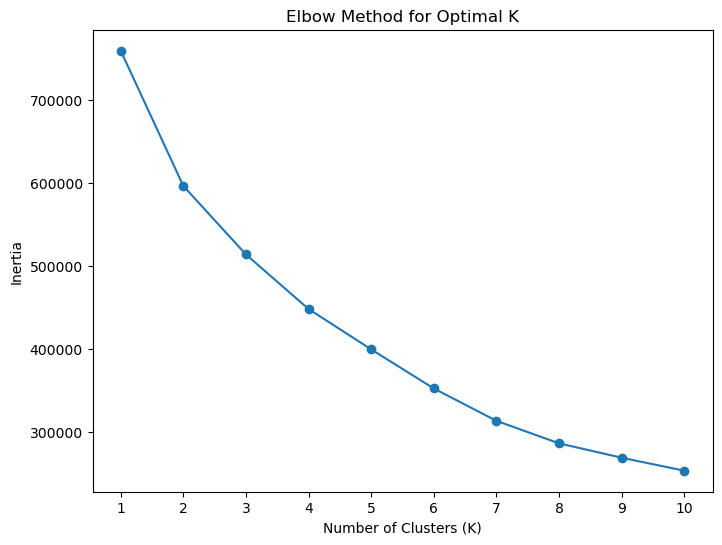

In [19]:
# Elbow Method for determining the K value
inertia_values = []
k_range = range (1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range,inertia_values,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

### We get the number of clusters as 2 as after this point , there is a linear decrease in the inertia of the dataset.

### Determining the number of values with Silhouette Score Method

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\clust

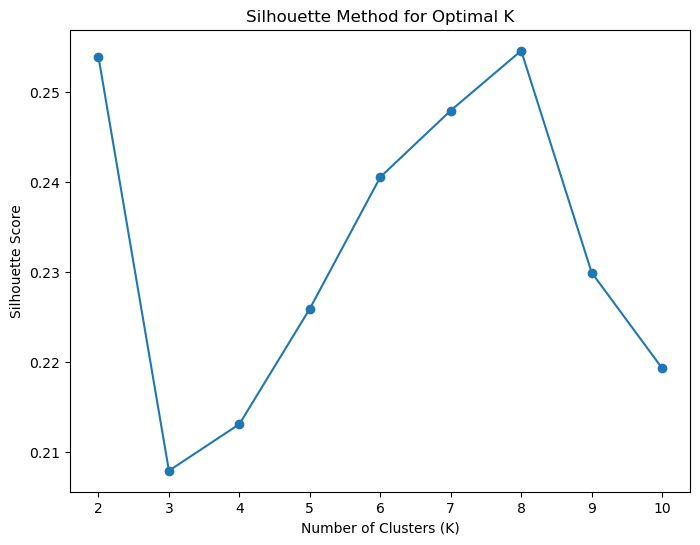

In [20]:
silhouette_scores = []
k_range = range(2, 11)  # Try different values of K from 2 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

#Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.xticks(k_range)
plt.show()

### We get the value as 2 or 8 as they are the maximum value of Silhouette Scores 

## 5. Building Recommedation Model with K-Means

In [21]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto")
kmeans.fit(df)

KMeans(n_init='auto', random_state=0)

In [22]:
data["type"] = kmeans.labels_
data.to_csv("result.csv", index=False)
new_df = pd.read_csv("result.csv")

In [23]:
new_df.head(7)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,7
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,1


In [25]:
# Prompt the user to enter their favorite song names
song_names_input = input('Enter comma-separated names of your favorite songs\n> ').strip().split(',')

# Convert each element in the input list to string explicitly
song_names_input = [str(song_name) for song_name in song_names_input]

# Filter the dataframe to get the user's favorite songs
favorites = new_df[new_df['track_name'].isin(song_names_input)]

# Check if favorites dataframe is empty
if favorites.empty:
    print('No matching songs found for the provided names.')
else:
    # Get the counts of each cluster
    clusters = favorites['type'].value_counts()

    # Find the user's favorite cluster
    user_favorite_cluster = clusters.idxmax()

    # Print the user's favorite cluster and other clusters
    print('\nFavorite cluster:', user_favorite_cluster)

    # Get songs from the user's favorite cluster
    suggestions_favorite_cluster = new_df[new_df['type'] == user_favorite_cluster]

    # Get the other cluster (excluding the user's favorite cluster)
    other_cluster = new_df[new_df['type'] != user_favorite_cluster]

Enter comma-separated names of your favorite songs
> Days I Will Remember

Favorite cluster: 7


In [26]:
# Now, concatenate both DataFrames to get the final suggestions
suggestions_combined = pd.concat([suggestions_favorite_cluster, other_cluster])

# Print the first few rows of the combined suggestions
print('\nSuggestions:')
suggestions_combined.head()


Suggestions:


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,...,1,0.1050,0.289,0.000000,0.1890,0.666,98.017,4,acoustic,7
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,...,1,0.0417,0.559,0.000000,0.0973,0.712,150.960,4,acoustic,7
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,...,1,0.0369,0.294,0.000000,0.1510,0.669,130.088,4,acoustic,7
17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54,169728,False,0.795,0.0841,10,...,0,0.0461,0.742,0.000012,0.0853,0.609,91.803,4,acoustic,7
18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,189613,False,0.625,0.4140,0,...,1,0.0369,0.294,0.000000,0.1510,0.669,130.088,4,acoustic,7


## 6. Building the Recommendation Model with DBSCAN

In [27]:
# Finding the value of epsilon in setting the parameters for the DBSCAN clustering model
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(df) 
distances,indices=nbrs.kneighbors(df)

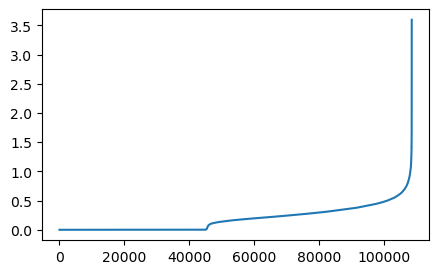

In [28]:
#Ploting the nearest Neighbors value to find Epsilon Value
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

### We can assume from the Graph above that the value of epsilon is between 0.5 and 1.0 due to the Elbow Point of the Graph

In [29]:
#Applying the DBSCAN algorithm 
dbscan_model = DBSCAN(eps=0.8, min_samples=2)
dbscan_model.fit(df)
clusters = dbscan_model.labels_

In [30]:
#Creating a column in the dataset which consists of the labels from the Algorithm
data["type"] = clusters
data.to_csv("results.csv", index=False)
dbscans = pd.read_csv("results.csv")

In [31]:
dbscans.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


In [32]:
# Prompt the user to enter their favorite song names
song_names_input = input('Enter comma-separated names of your favorite songs\n> ').strip().split(',')

# Convert each element in the input list to string explicitly
song_names_input = [str(song_name) for song_name in song_names_input]

# Filter the dataframe to get the user's favorite songs
favorites = dbscans[dbscans['track_name'].isin(song_names_input)]

if favorites.empty:
    print('No matching songs found for the provided names.')
else:
    clusters = favorites['type'].value_counts()

    # Find the user's favorite cluster
    user_favorite_cluster = clusters.idxmax()

    print('\nFavorite cluster:', user_favorite_cluster)

    # Get songs from the user's favorite cluster
    suggestions_favorite_cluster = dbscans[dbscans['type'] == user_favorite_cluster]

    # Get the other cluster (excluding the user's favorite cluster)
    other_cluster = dbscans[dbscans['type'] != user_favorite_cluster]

Enter comma-separated names of your favorite songs
> Days I Will Remember

Favorite cluster: 0


In [33]:
# Now, concatenate both DataFrames to get the final suggestions
suggestions_combined = pd.concat([suggestions_favorite_cluster, other_cluster])

# Print the first few rows of the combined suggestions
print('\nSuggestions:')
suggestions_combined.head()


Suggestions:


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


## 7.Building a Recommendation Model with Agglomerative Clustering

In [34]:
#We take a small subset of the dataset to apply Agglomerative Clustering algorithm
subset_size = 1000
subset_data = data.sample(n=subset_size, random_state=42)

In [35]:
#Selecting the features/varibales we want to run the model on and give recommendations o
features = ["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]
df = subset_data[features]

In [36]:
#Scaling the variables with MinMaxScaler function from sklearn pre-processing
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [40]:
#Applying the Clustering Algorithm on the dataset
clustering = AgglomerativeClustering(n_clusters=8)
subset_data['cluster'] = clustering.fit_predict(df_scaled)

In [41]:
subset_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type,cluster
94767,7cSLuynax4DXSi9G28wPXk,yaeow,sad girl,sad girl,41,212093,False,0.547,0.120,11,...,0.0364,0.8790,0.00000,0.1000,0.3760,86.012,4,sad,0,1
85648,7iLz34DTToaD3C6V1o5GbH,O Surto,Meu Primeiro Hit! (Rock),A Cera,37,227626,False,0.591,0.765,2,...,0.0519,0.0671,0.00000,0.0677,0.4950,133.289,4,punk-rock,0,0
73803,0OPqp8nvfE0TVfcpUHJgcM,Rodriguez Jr.;Liset Alea;RJLA,Baobab,Waste Tomorrow,37,353227,False,0.718,0.402,2,...,0.0398,0.0174,0.67900,0.0907,0.0948,121.994,4,minimal-techno,0,2
61251,7hT9QzdqxxoWB0JtCGuCnD,Mariya Takeuchi,REQUEST (30th Anniversary Edition),"OH NO,OH YES!",49,318306,False,0.729,0.741,10,...,0.0345,0.4910,0.00172,0.0554,0.9600,147.319,4,j-idol,0,3
90441,57Uadt78FPP6JmC19JufWZ,Mayte Gaos,La Fiebre del Rock and Roll,Vete Con Ella (Chappel of Love),33,173760,False,0.600,0.371,2,...,0.0273,0.7350,0.00000,0.3100,0.6560,125.603,4,rock-n-roll,0,1


In [42]:
# Prompt the user to enter their favorite song names
song_names_input = input('Enter comma-separated names of your favorite songs\n> ').strip().split(',')

# Convert each element in the input list to string explicitly
song_names_input = [str(song_name) for song_name in song_names_input]

# Filter the dataframe to get the user's favorite songs
favorites = subset_data[subset_data['track_name'].isin(song_names_input)]

# Check if favorites dataframe is empty
if favorites.empty:
    print('No matching songs found for the provided names.')
else:
    clusters = favorites['cluster'].value_counts()
    
    user_favorite_cluster = clusters.idxmax()

    # Print the user's favorite cluster and other clusters
    print('\nFavorite cluster:', user_favorite_cluster)

    # Get songs from the user's favorite cluster
    suggestions_favorite_cluster = subset_data[subset_data['cluster'] == user_favorite_cluster]

    # Get the other cluster (excluding the user's favorite cluster)
    other_cluster = subset_data[subset_data['type'] != user_favorite_cluster]

Enter comma-separated names of your favorite songs
> Waste Tomorrow

Favorite cluster: 2


In [43]:
# Now, concatenate both DataFrames to get the final suggestions
suggestions_combined = pd.concat([suggestions_favorite_cluster, other_cluster])

# Print the first few rows of the combined suggestions
print('\nSuggestions:')
suggestions_favorite_cluster.head()


Suggestions:


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type,cluster
73803,0OPqp8nvfE0TVfcpUHJgcM,Rodriguez Jr.;Liset Alea;RJLA,Baobab,Waste Tomorrow,37,353227,False,0.718,0.402,2,...,0.0398,0.017400,0.679,0.0907,0.0948,121.994,4,minimal-techno,0,2
31218,1DGY9hhepLMDQzdkdK3GrX,The Chainsmokers,So Far So Good (lofi remixes),Riptide - lofi remix,0,156067,False,0.722,0.338,1,...,0.0730,0.502000,0.857,0.1040,0.1830,79.997,4,electro,0,2
71397,4wjKsLqJqLYBzaEO7iD4Fp,White Zombie,Halloween Metal Nights,More Human Than Human,0,269693,True,0.659,0.961,6,...,0.0829,0.000425,0.423,0.1050,0.5370,101.368,4,metal,0,2
110384,7IBPhceLwEKHWKqc1MvVuK,Synergetic Emotion,Feeling,Feeling,42,239999,False,0.649,0.685,1,...,0.0539,0.052100,0.792,0.1330,0.1380,140.017,4,trance,0,2
111348,378gCRTm2WTsd5Ie2KMwCw,Nicola Conte,Jet Sounds Revisited,Tema In Hi-Fi - Performed By Nicola Conte Gian...,22,333217,False,0.576,0.867,10,...,0.0413,0.175000,0.835,0.1110,0.8080,171.992,4,trip-hop,0,2


## 8.User FeedBack

In [2]:
# Gather user feedback through an interactive prompt
feedback = input('\nDid you find the suggestions helpful? (Yes/No): ').strip().lower()

if feedback == 'yes':
    print('We are glad you found the suggestions helpful. Your feedback motivates us to improve!')
elif feedback == 'no':
    print('We apologize for the inconvenience. We are continuously working to improve our recommendations.')
    additional_feedback = input('Please let us know how we can make the suggestions better: ')
    print('Thank you for your valuable feedback. We will take it into consideration for future improvements.')
else:
    print('Invalid feedback. Please provide a valid response (Yes/No).')

print('Thank you for your time!')


Did you find the suggestions helpful? (Yes/No): Yes
We are glad you found the suggestions helpful. Your feedback motivates us to improve!
Thank you for your time!
